In [ ]:
##### Data Pre-procesing Step #####   
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
import seaborn as sns
import io
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Load your dataset here
from google.colab import files
uploaded = files.upload()
print ('Data read into a pandas dataframe!')

Saving bank.csv to bank (13).csv
Data read into a pandas dataframe!


In [ ]:
data_set = pd.read_csv(io.BytesIO(uploaded['bank.csv']),delimiter=';')

In [ ]:
data_set.shape

(4521, 17)

In [ ]:
#  Find missing values of each feature in the data set.
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


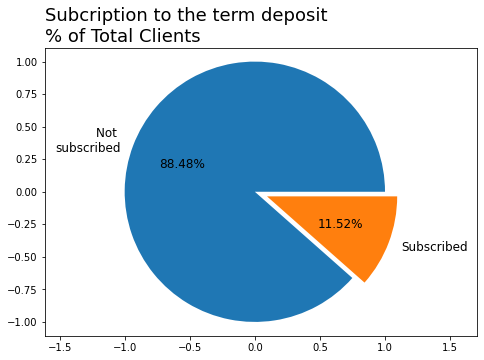

In [ ]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = mtp.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(data_set['y'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
mtp.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')

mtp.show()

#11.27% customers subscribed to the term deposit. Our classes are imbalanced where positive values (subscribed) are only 11.27%

In [ ]:
enc = OrdinalEncoder()
column_list = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']
data_set[column_list] = nm.array(enc.fit_transform(data_set[column_list]),dtype = int)

In [ ]:
data_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0


In [ ]:
#Extracting Independent and dependent Variable and using SMOTE to handle oversampling which only 11.27% customers subscribed to the term deposit
x= data_set.iloc[:, [0,5]].values  
y= data_set.iloc[:, 16].values  
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_sm, y_sm = oversample.fit_resample(x, y)


In [ ]:
# Splitting the dataset into training and test set into 80:20.  
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state=0)

In [ ]:
##### LOGISTIC REGRESSION #####
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm

array([[504, 298],
       [385, 413]])

In [ ]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Test set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  

In [ ]:
##### K-NEAREST NEIGHBORS #####
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [ ]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  

In [ ]:
#Visualizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN algorithm(Test set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  

In [ ]:
##### Support vector classifier #####
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('SVM classifier (Training set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('SVM classifier (Test set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  

In [ ]:
##### NAIVE BAYES #####
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

In [ ]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)  

In [ ]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [ ]:
# Visualising the Training set results  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (Training set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  

In [ ]:
# Visualising the Test set results  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (test set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  

In [ ]:
##### RANDOM FOREST #####
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Random Forest Algorithm (Training set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Random Forest Algorithm(Test set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  

In [ ]:
##### DECISION TREE #####
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
fori, j in enumerate(nm.unique(y_set)):  
mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Decision Tree Algorithm (Training set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
fori, j in enumerate(nm.unique(y_set)):  
mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Decision Tree Algorithm(Test set)')  
mtp.xlabel('age')  
mtp.ylabel('balance')  
mtp.legend()  
mtp.show()  